# Supervised Learning: Fraud Detection in E-Commerce

## Problem Definition
The objective of this study is to develop a binary classification model capable of detecting fraudulent e-commerce transactions. The target variable represents whether a transaction is fraudulent (`1`) or legitimate (`0`). The outcome of this model is intended to support the early identification of fraudulent activity, improving online transaction security.

## Dataset Description
This project utilizes two publicly available datasets:
- `Dataset1.csv`: A detailed transactional dataset that includes demographic, behavioral, and transactional features.
- `Dataset2.csv`: A more compact dataset focused on user and transaction metadata.

Given their complementary nature, these datasets will be merged to construct a richer feature space for model training.
However, the datasets present differences in their structure and attribute naming, which necessitates a standardization process before merging.

## Setup and Data Loading
We begin by importing the necessary libraries and loading the datasets.

In [13]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load datasets
dataset1 = pd.read_csv('Datasets/Dataset1.csv')
dataset2 = pd.read_csv('Datasets/Dataset2.csv')

### Column Comparison
We first inspect the structure of both datasets to identify differences in column names and schema.

In [14]:
print("Dataset 1 Columns:\n", dataset1.columns, "\n")
print("Dataset 2 Columns:\n", dataset2.columns)

Dataset 1 Columns:
 Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object') 

Dataset 2 Columns:
 Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')


### Standardization
Several columns in dataset2 refer to similar concepts as those in dataset1, although with different names. We rename those columns to ensure semantic alignment.

In [15]:
dataset2_renamed = dataset2.rename(columns={
    'user_id': 'Customer ID',
    'purchase_time': 'Transaction Date',
    'purchase_value': 'Transaction Amount',
    'ip_address': 'IP Address',
    'age': 'Customer Age',
    'class': 'Is Fraudulent'
})

Additionally, we add missing columns with 'NaN' to maintain consistency across datasets.

In [16]:
missing_columns = set(dataset1.columns) - set(dataset2_renamed.columns)
for col in missing_columns:
    dataset2_renamed[col] = np.nan

# Align column order to match dataset1
dataset2_aligned = dataset2_renamed[dataset1.columns]

dataset2_aligned[dataset2_aligned.isna().any(axis=1)] #display the rows with na values

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,NaN,22058,34,2015-04-18 02:47:11,NaN,NaN,NaN,39,NaN,NaN,7.327584e+08,NaN,NaN,0,NaN,NaN
1,NaN,333320,16,2015-06-08 01:38:54,NaN,NaN,NaN,53,NaN,NaN,3.503114e+08,NaN,NaN,0,NaN,NaN
2,NaN,1359,15,2015-01-01 18:52:45,NaN,NaN,NaN,53,NaN,NaN,2.621474e+09,NaN,NaN,1,NaN,NaN
3,NaN,150084,44,2015-05-04 13:54:50,NaN,NaN,NaN,41,NaN,NaN,3.840542e+09,NaN,NaN,0,NaN,NaN
4,NaN,221365,39,2015-09-09 18:40:53,NaN,NaN,NaN,45,NaN,NaN,4.155831e+08,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,NaN,345170,43,2015-03-29 00:30:47,NaN,NaN,NaN,28,NaN,NaN,3.451155e+09,NaN,NaN,1,NaN,NaN
151108,NaN,274471,35,2015-05-26 12:24:39,NaN,NaN,NaN,32,NaN,NaN,2.439047e+09,NaN,NaN,0,NaN,NaN
151109,NaN,368416,40,2015-05-20 07:07:47,NaN,NaN,NaN,26,NaN,NaN,2.748471e+09,NaN,NaN,0,NaN,NaN
151110,NaN,207709,46,2015-09-07 09:34:46,NaN,NaN,NaN,37,NaN,NaN,3.601175e+09,NaN,NaN,0,NaN,NaN


### Merging the Datasets
With both datasets now aligned in schema, we concatenate them into a single unified dataset.

In [17]:
merged_data = pd.concat([dataset1, dataset2_aligned], ignore_index=True)

# Preview the merged dataset
merged_data.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1.0,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30.0,5.0
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2.0,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72.0,8.0
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2.0,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63.0,3.0
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5.0,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124.0,20.0
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2.0,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158.0,5.0


### Removal of Non-Analytical Columns
The merged dataset contains several columns; however, some of these, such as 'Transaction ID' and 'Customer ID', do not provide meaningful analytical value. As such, we will exclude these from the dataset.
The 'Shipping Address' and 'Billing Address' columns, while not directly useful for analysis on their own, may hold important insights regarding the potential for fraudulent activity when compared. Specifically, the match between these two addresses could indicate suspicious behavior. Therefore, instead of keeping both columns, we will create a new binary column, "Address Match," that will store 1 if the shipping and billing addresses match, and 0 if they do not.

In [18]:
merged_data.drop(columns=['Transaction ID', 'Customer ID', 'IP Address'], inplace=True)

merged_data['Address Match'] = (merged_data['Shipping Address'] == merged_data['Billing Address']).astype(int)

merged_data.drop(columns=['Shipping Address', 'Billing Address'], inplace=True)

# Preview the merged dataset
merged_data.head()
"Transaction.Hour","source","browser","sex","Payment.Method","Product.Category","Quantity","Device.Used","Address.Match"


('Transaction.Hour',
 'source',
 'browser',
 'sex',
 'Payment.Method',
 'Product.Category',
 'Quantity',
 'Device.Used',
 'Address.Match')

### Missing Value Analysis and Processing
We evaluate the presence of missing data in the merged dataset, which will guide the preprocessing steps that follow.

In [19]:
print("Missing values per column:\n", merged_data.isnull().sum())

Missing values per column:
 Transaction Amount         0
Transaction Date           0
Payment Method        151112
Product Category      151112
Quantity              151112
Customer Age               0
Customer Location     151112
Device Used           151112
Is Fraudulent              0
Account Age Days      151112
Transaction Hour      151112
Address Match              0
dtype: int64


To address missing values effectively, we will employ probability-based imputation. This approach leverages the distribution of known values within the dataset to generate plausible replacements for missing entries. By doing so, we maintain the integrity of the data while minimizing potential biases introduced by arbitrary filling methods.

In [20]:
def calculate_probabilities(col):
    '''Calculates the probability of the value appearing in the data frame'''
    data = merged_data[col][merged_data[col].notna()]
    probabilities = data.value_counts(normalize = True)
    return probabilities
print(calculate_probabilities("Device Used")) #just to show how the function works


Device Used
mobile     0.333849
tablet     0.333302
desktop    0.332849
Name: proportion, dtype: float64


In [21]:
#Perform the insertion of value in NA cells
for column in merged_data.columns:
    probabilities = calculate_probabilities(column)
    
    # Identify missing values
    na_mask = merged_data[column].isna()

    # Efficiently replace missing values using NumPy's choice function
    merged_data.loc[na_mask, column] = np.random.choice(list(probabilities.index), size=len(merged_data.loc[na_mask, column]), p=probabilities.values)

Now, there should not be any NA value in the dataframe.

In [22]:
print(f'Number of NA values in column \"Device Used \" : {merged_data.loc[merged_data["Device Used"].isna(), "Device Used"].count()}')

Number of NA values in column "Device Used " : 0


## Row Selection

The merged dataset has more than 1.5 milion rows. This huge number of rows makes the algorithms and other computaions very hard to perform. To make the dataset easier to process, we are going to select, randomly, 20% of the rows to procede the analysis.

In [42]:
import os

# only creates and stores a sample if it doesn't exists yet
if not os.path.exists("Datasets/sample_dataset.csv"):
    data_sample = merged_data.sample(frac=0.2)
    data_sample.to_csv("Datasets/sample_dataset.csv", index=False)

merged_data = pd.read_csv("Datasets/sample_dataset.csv")

## Outliers and Strange Values

In this section, we will identify outliers and other anomalies that may introduce biases or distort the integrity of the dataset. By detecting and addressing these irregular values, we aim to enhance data reliability and improve analytical accuracy.

Firstly, we need to plot the data to better visualize it.

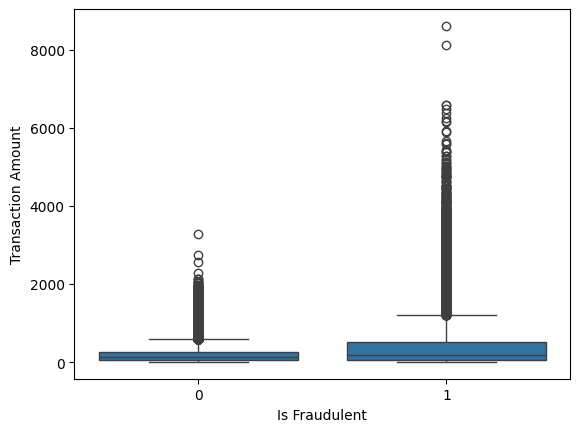

In [27]:
#Transaction amount comparison between fraudulent and legitimate transactions
sb.boxplot(x="Is Fraudulent", y="Transaction Amount", data=merged_data)
plt.show()

The plot reveals that fraudulent transactions exhibit a wider range of transaction amounts, but they tend to be larger than non-fraudulent transactions overall. Additionally, some values significantly exceed expected ranges, particularly within fraudulent transactions. 
To enhance precision and maintain data consistency, we need to remove rows where fraudulent transactions exceed 7,000 and non-fraudulent transactions surpass 2,500

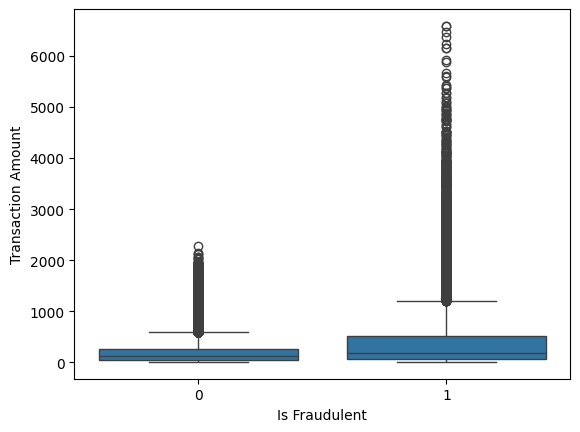

In [39]:
merged_data = merged_data[((merged_data["Transaction Amount"] < 7000) & (merged_data["Is Fraudulent"] == 1)) | ((merged_data["Transaction Amount"] < 2500) & (merged_data["Is Fraudulent"] == 0))]

sb.boxplot(x="Is Fraudulent", y="Transaction Amount", data=merged_data)
plt.show()

The data is now more consistent. However, some values in the fraudulent transactions still appear abnormal. To enhance precision, we can filter out rows where fraudulent transaction amounts exceed 5,500. This step will help eliminate significant outliers. Additionally, as a precautionary measure, we should remove any rows with transaction amounts below zero.

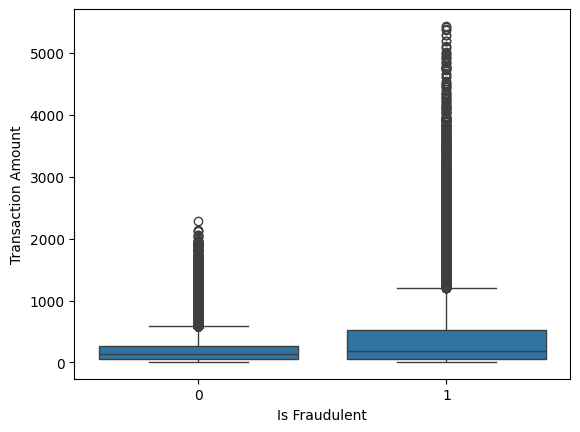

In [43]:
merged_data = merged_data[((merged_data["Transaction Amount"] < 5500) & (merged_data["Is Fraudulent"] == 1)) | ((merged_data["Transaction Amount"] < 2500) & (merged_data["Is Fraudulent"] == 0)) & (merged_data["Transaction Amount"] >= 0)]
sb.boxplot(x="Is Fraudulent", y="Transaction Amount", data=merged_data)
plt.show()

The next step is to analyse the dates an see if there is any strange pattern or outliers in the date values.

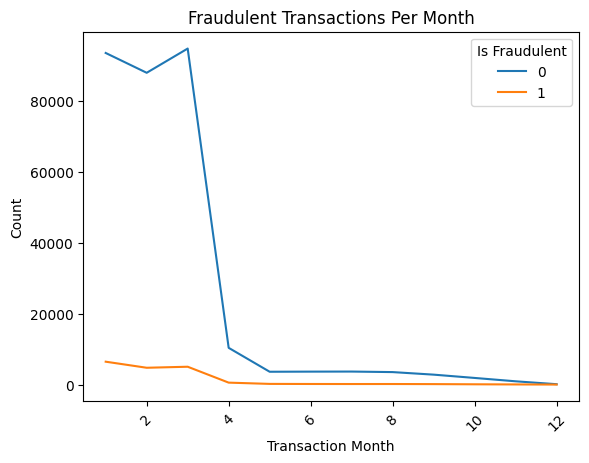

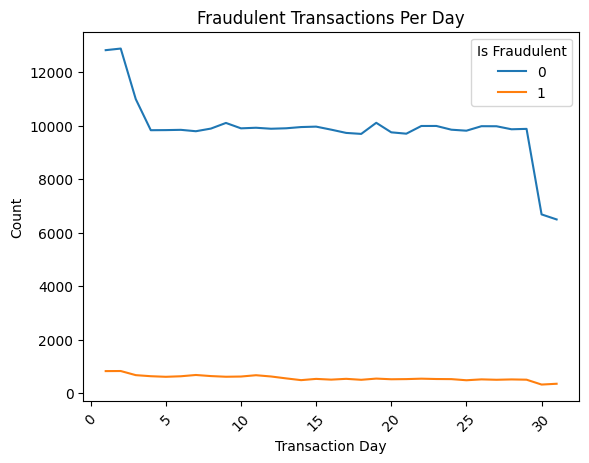

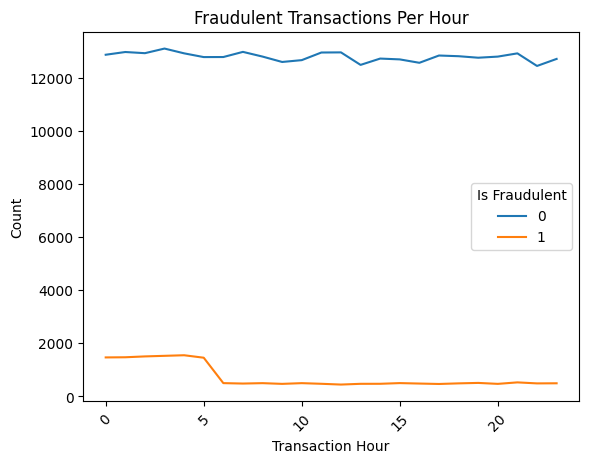

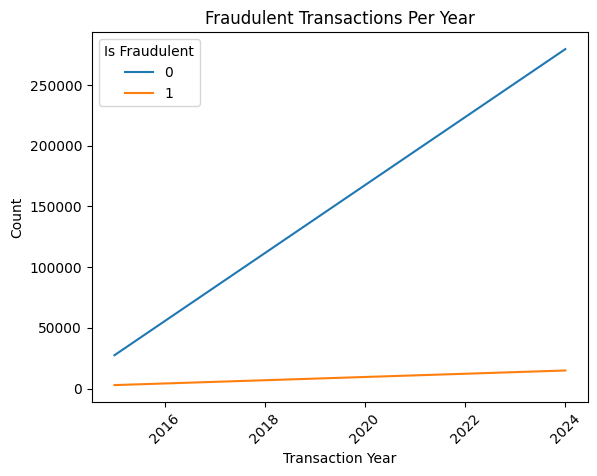

[2015 2024]


In [ ]:
# Transaction Date comparison between fraudulent and legitimate transactions
merged_data["Transaction Date"] = pd.to_datetime(merged_data["Transaction Date"])
merged_data["Transaction Month"] = merged_data["Transaction Date"].dt.month
merged_data["Transaction Day"] = merged_data["Transaction Date"].dt.day
merged_data["Transaction Year"] = merged_data["Transaction Date"].dt.year

monthly_fraud = merged_data.groupby(["Transaction Month", "Is Fraudulent"]).size().reset_index(name="Count")
sb.lineplot(x="Transaction Month", y="Count", hue="Is Fraudulent", data=monthly_fraud)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Month")
plt.show()

daily_fraud = merged_data.groupby(["Transaction Day", "Is Fraudulent"]).size().reset_index(name="Count")
sb.lineplot(x="Transaction Day", y="Count", hue="Is Fraudulent", data=daily_fraud)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Day")
plt.show()

hour_fraud = merged_data.groupby(["Transaction Hour", "Is Fraudulent"]).size().reset_index(name="Count")
sb.lineplot(x="Transaction Hour", y="Count", hue="Is Fraudulent", data=hour_fraud)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Hour")
plt.show()

year_fraud = merged_data.groupby(["Transaction Year", "Is Fraudulent"]).size().reset_index(name="Count")
sb.lineplot(x="Transaction Year", y="Count", hue="Is Fraudulent", data=year_fraud)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Year")
plt.show()


The plots do not indicate any abnormalities in the data, such as outliers or unexpected values. The dataset contains only two years—2024 and 2015—due to the merging process at the beginning, where one dataset exclusively featured 2024 dates and the other contained records from 2015. Additionally, **fraudulent transactions** are more frequent between **midnight and 5 AM**, whereas non-fraudulent transactions remain relatively stable throughout this period. A slight increase in fraud is also noticeable in the early months of the year. However, since non-fraudulent transactions also rise during this period, this likely reflects a higher number of recorded transactions from the beginning of the year rather than an isolated fraud pattern.


Now, we will analyse the payment methods. 

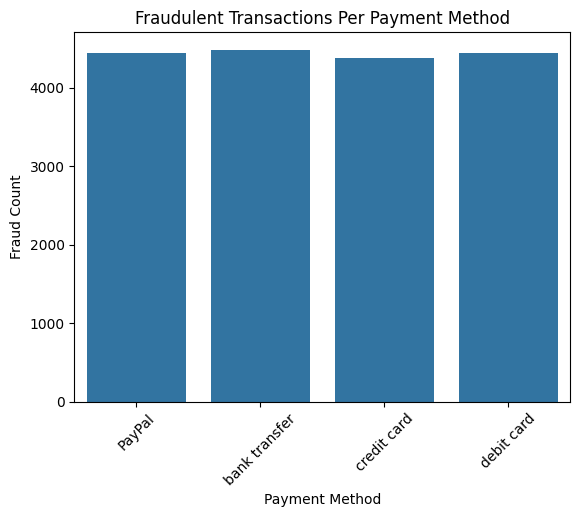

In [ ]:
# Count fraudulent transactions
fraud_counts = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Payment Method").size().reset_index(name="Fraud Count")

sb.barplot(x="Payment Method", y="Fraud Count", data=fraud_counts)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Payment Method")
plt.show()

The plot indicates that the number of fraudulent transactions across payment methods is nearly identical. To enhance visualization and gain deeper insights into how payment methods influence fraud, we should compare the ratio of fraudulent transactions per method to total transactions per method.

  Payment Method  Fraud Transactions  Total Transactions
0         PayPal                4442               80898
1  bank transfer                4485               81324
2    credit card                4380               81151
3     debit card                4446               81423


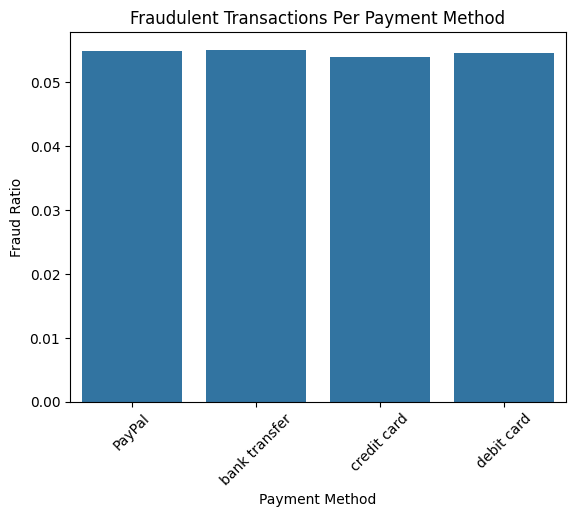

In [47]:
# Count total transactions per payment method
total_transactions = merged_data.groupby("Payment Method").size().reset_index(name="Total Transactions")

# Count fraudulent transactions per payment method
fraud_transactions = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Payment Method").size().reset_index(name="Fraud Transactions")

# Merge both counts
fraud_ratio = fraud_transactions.merge(total_transactions, on="Payment Method", how="left")

print(fraud_ratio)

# Calculate fraud ratio
fraud_ratio["Fraud Ratio"] = fraud_ratio["Fraud Transactions"] / fraud_ratio["Total Transactions"]

sb.barplot(x="Payment Method", y="Fraud Ratio", data=fraud_ratio)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Payment Method")
plt.show()

After analyzing the ratio, we can see that it remains fairly consistent across different payment methods. As a result, it does not provide meaningful insights for identifying fraudulent transactions.

Now we are going to analyse the product category.

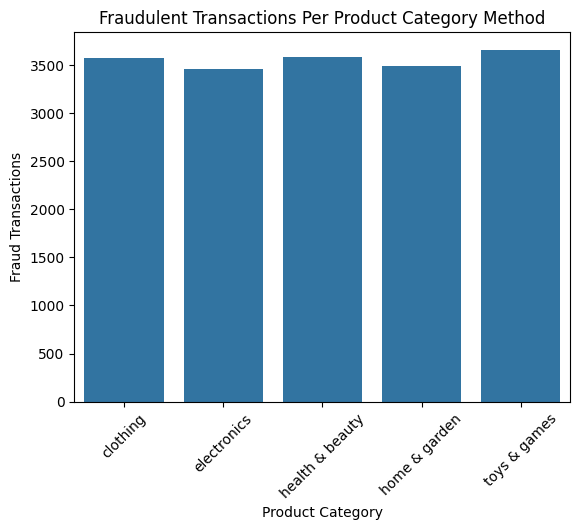

In [48]:
# Count fraudulent transactions per product category
fraud_transactions = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Product Category").size().reset_index(name="Fraud Transactions")

sb.barplot(x="Product Category", y="Fraud Transactions", data=fraud_transactions)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Product Category Method")
plt.show()

The plot indicates no clear relationship between product category and fraudulent transactions. To gain deeper insights, we should analyze the ratio of fraudulent transactions per product category relative to the total number of transactions in each category.

  Product Category  Fraud Transactions  Total Transactions
0         clothing                3569               64813
1      electronics                3454               65328
2  health & beauty                3584               65016
3    home & garden                3488               64864
4     toys & games                3658               64775


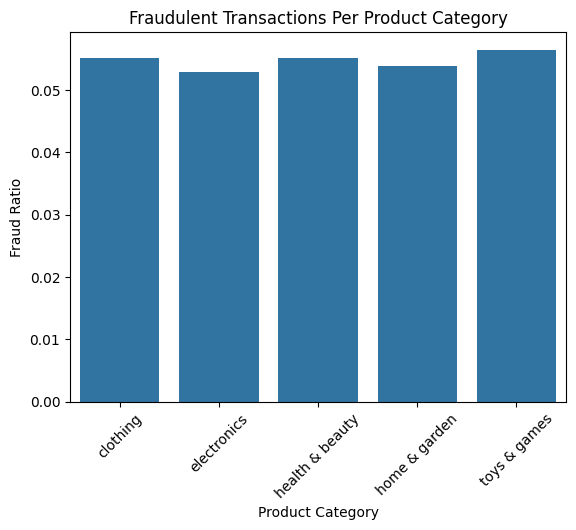

In [49]:
# Count total transactions per Product Category
total_transactions = merged_data.groupby("Product Category").size().reset_index(name="Total Transactions")

# Count fraudulent transactions per Product Category
fraud_transactions = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Product Category").size().reset_index(name="Fraud Transactions")

# Merge both counts
fraud_ratio = fraud_transactions.merge(total_transactions, on="Product Category", how="left")

print(fraud_ratio)

# Calculate fraud ratio
fraud_ratio["Fraud Ratio"] = fraud_ratio["Fraud Transactions"] / fraud_ratio["Total Transactions"]

sb.barplot(x="Product Category", y="Fraud Ratio", data=fraud_ratio)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Product Category")
plt.show()

The ratio indicates that product category is not a strong predictor of fraudulent transactions. While the **"Toys and Games"** category shows a slightly higher fraud ratio, the difference is minimal and not statistically significant.

The next column to analyse is the Quantity

count    324796.000000
mean          2.999292
std           1.416152
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Quantity, dtype: float64


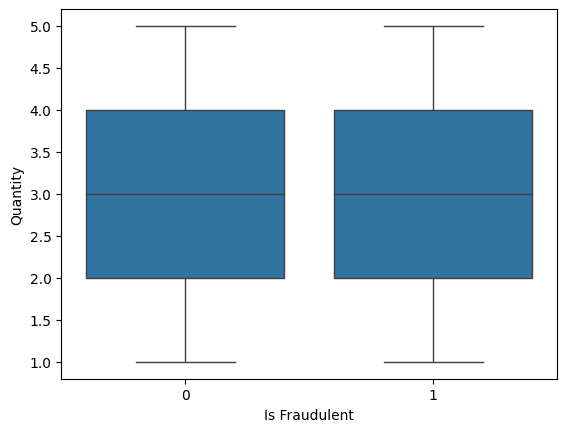

In [51]:
#Quantity comparison between fraudulent and legitimate transactions
print(merged_data["Quantity"].describe())
sb.boxplot(x="Is Fraudulent", y="Quantity", data=merged_data)
plt.show()

The quantity of items in transactions is similar for both fraudulent and non-fraudulent cases, with no detectable outliers in either category. In general, this column does not appear to be a strong indicator for identifying fraudulent transactions. 

Now we are going to analyse the customer age.

count    324796.000000
mean         34.384962
std           9.907287
min         -13.000000
25%          28.000000
50%          34.000000
75%          41.000000
max          80.000000
Name: Customer Age, dtype: float64


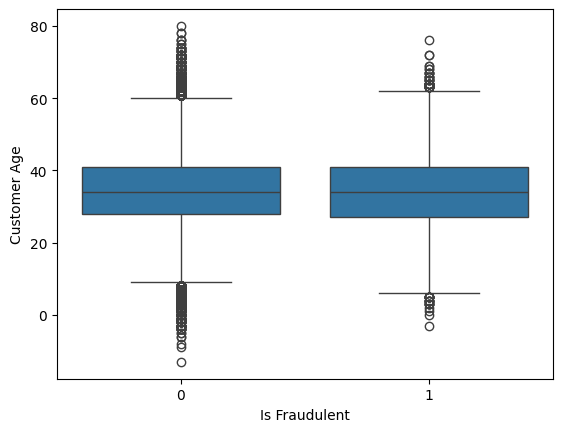

In [52]:
#Customer age comparison between fraudulent and legitimate transactions
print(merged_data["Customer Age"].describe())
sb.boxplot(x="Is Fraudulent", y="Customer Age", data=merged_data)
plt.show()

The data reveals some negative ages that need to be removed. While non-fraudulent transactions show more outliers than fraudulent ones, the average remains the same in both cases. Additionally, certain ages appear suspicious—customers under 18 should generally not be able to make transactions. The plot even shows transactions from customers under 10 years old, which is practically impossible. However, since we do not have access to the platform's age restrictions, we will only remove rows where the customer age is less than zero. In this case, outliers should not be removed—except for values below zero—since they do not significantly deviate from the average. Additionally, these outliers primarily represent individuals who engage in fewer online transactions, such as the elderly and teenagers.

count    324743.000000
mean         34.391063
std           9.896536
min           0.000000
25%          28.000000
50%          34.000000
75%          41.000000
max          80.000000
Name: Customer Age, dtype: float64


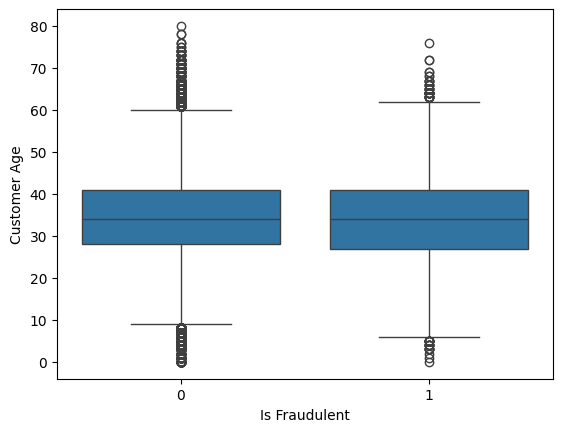

In [53]:
#Filter the data
merged_data = merged_data[merged_data["Customer Age"] >= 0]

#Customer age comparison between fraudulent and legitimate transactions with the filtered data
print(merged_data["Customer Age"].describe())
sb.boxplot(x="Is Fraudulent", y="Customer Age", data=merged_data)
plt.show()